CNN

In [6]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt 


In [7]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

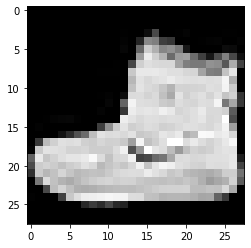

In [8]:
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap='gray')

class_names = train_data.classes
class_names

In [1]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols  = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')



NameError: name 'torch' is not defined

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

len(train_dataloader)

1875

In [31]:
class FashionMNSITModel_V0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),          
                      
        )

    def forward(self, x):
        return self.layer_stack(x)

In [32]:
torch.manual_seed(42)

model_0 = FashionMNSITModel_V0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)

model_0

FashionMNSITModel_V0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [33]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [34]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [35]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)



In [36]:
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [37]:
from tqdm.auto import tqdm
from timeit import default_timer as timer 

train_time_start = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    ### Training:
    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss = train_loss / len(train_dataloader)

    ## Testing

    test_loss, test_acc = 0, 0

    model_0.eval()

    with torch.inference_mode():
        for X_test,y_test in test_dataloader:

            test_pred = model_0(X_test) 

            test_loss += loss_fn(test_pred, y_test)

            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:10<00:21, 10.82s/it]


Train loss: 0.58776 | Test loss: 0.63224, Test acc: 77.05%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:21<00:10, 10.67s/it]


Train loss: 0.47601 | Test loss: 0.50463, Test acc: 82.06%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:32<00:00, 10.90s/it]


Train loss: 0.45247 | Test loss: 0.50128, Test acc: 81.98%

Train time on cpu: 32.695 seconds


In [38]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    
    loss, acc = 0,0 
    model.eval()
    
    with torch.inference_mode():
        for X, y in data_loader:

            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))


        loss = loss / len(data_loader)
        acc = acc / len(data_loader)

    
    return {"model-name":model.__class__.__name__, 
            "model_loss":loss.item(),
            "model_accuracy":acc}


results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)

print(results)


{'model-name': 'FashionMNSITModel_V0', 'model_loss': 0.5012819766998291, 'model_accuracy': 81.97883386581469}


Non Linear Model

In [39]:
class FashionMNSITModel_V1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),          
            nn.ReLU()          
        )

    def forward(self, x):
        return self.layer_stack(x)
    
torch.manual_seed(42)

model_1 = FashionMNSITModel_V1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)

model_1

FashionMNSITModel_V1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): ReLU()
  )
)

In [40]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)



In [41]:
from tqdm.auto import tqdm
from timeit import default_timer as timer 

train_time_start = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    train_loss = 0

    ## Training
    for batch, (X,y) in enumerate(train_dataloader):

        model_1.train()

        y_pred = model_1(X)

        loss = loss_fn(y_pred, y)

        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss = train_loss / len(train_dataloader)

    ## Testing

    model_1.eval()
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_1(X_test)
            loss = loss_fn(test_pred, y_test)
            test_loss += loss

            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:10<00:21, 10.81s/it]


Train loss: 0.71490 | Test loss: 0.59604, Test acc: 79.01%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:21<00:10, 10.81s/it]


Train loss: 0.49075 | Test loss: 0.47772, Test acc: 83.22%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:32<00:00, 10.77s/it]


Train loss: 0.45089 | Test loss: 0.47055, Test acc: 83.27%

Train time on cpu: 32.321 seconds


In [42]:
results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)

print(results)

{'model-name': 'FashionMNSITModel_V1', 'model_loss': 0.47055336833000183, 'model_accuracy': 83.2667731629393}


Model 2

In [11]:
class FashionMNSITModel_V2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=(3,3),
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3,3),
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3,3),
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3,3),
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)

        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x
    
torch.manual_seed(42)

model_2 = FashionMNSITModel_V2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
)

model_2

FashionMNSITModel_V2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [12]:
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(test_image.shape)

torch.Size([3, 64, 64])


In [13]:
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=(3,3),
                      stride=1,
                      padding=0)

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [14]:
model_2(image.unsqueeze(dim=0))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

In [23]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [24]:
from tqdm.auto import tqdm
from timeit import default_timer as timer 

train_time_start = timer()
epochs = 4

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    ## Training

    train_loss = 0
    model_2.train()

    for batch, (X,y) in enumerate(train_dataloader):

        y_pred = model_2(X)

        loss = loss_fn(y_pred, y)
        print("+++++++++++++++++++++++++")
        print("Loss")
        print(loss)
        print("+++++++++++++++++++++++++")

        print(x)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss = train_loss / len(train_dataloader)

    model_2.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:

            test_pred = model_2(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
            
train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_1.parameters()).device))

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0
-------
+++++++++++++++++++++++++
Loss
tensor(19.5293, grad_fn=<NllLossBackward0>)
+++++++++++++++++++++++++


NameError: name 'x' is not defined

In [21]:
results = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn)

print(results)

NameError: name 'eval_model' is not defined